# Inferential Statistics

## Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. 

### Assumptions of ANOVA

* 1) All populations involved follow a normal distribution
* 2) All populations have the same variance
* 3) The samples are randomly selected and independent of one another


## One-way ANOVA

### Example 1

Consider the monthly income of members from three different gyms - fitness centers given below:
* Gym 1 (n = 22): [60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73]
* Gym 2 (n = 18): [56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64]
* Gym 3 (n = 23): [67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45]  
Using ANOVA, test whether the mean monthly income is equal for each Gym.


In [8]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [9]:
Gym_1 = np.array([60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73])
Gym_2 = np.array([56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64])
Gym_3 = np.array([67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45])  

print('Count, Mean and standard deviation of monthly income of members of Gym 1: %3d, %3.2f and %3.2f' % (len(Gym_1), Gym_1.mean(),np.std(Gym_1,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 2: %3d, %3.2f and %3.2f' % (len(Gym_2), Gym_2.mean(),np.std(Gym_2,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 3: %3d, %3.2f and %3.2f' % (len(Gym_3), Gym_3.mean(),np.std(Gym_3,ddof =1)))

Count, Mean and standard deviation of monthly income of members of Gym 1:  22, 62.55 and 8.67
Count, Mean and standard deviation of monthly income of members of Gym 2:  18, 63.28 and 7.79
Count, Mean and standard deviation of monthly income of members of Gym 3:  23, 60.83 and 8.00


In [10]:
monthly_inc_df = pd.DataFrame()

df1            = pd.DataFrame({'Gym': '1', 'Monthly_inc':Gym_1})
df2            = pd.DataFrame({'Gym': '2', 'Monthly_inc':Gym_2})
df3            = pd.DataFrame({'Gym': '3', 'Monthly_inc':Gym_3})

monthly_inc_df = monthly_inc_df.append(df1) 
monthly_inc_df = monthly_inc_df.append(df2) 
monthly_inc_df = monthly_inc_df.append(df3) 

### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

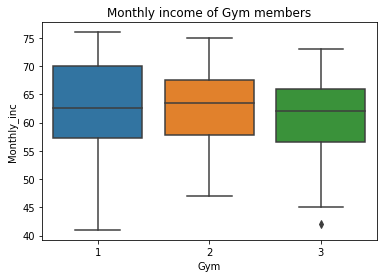

In [11]:
sns.boxplot(x = "Gym", y = "Monthly_inc", data = monthly_inc_df)
plt.title('Monthly income of Gym members')
plt.show()

#### The boxplots show almost similar shapes, location and spreads and group 3 has an low outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate F, a test statistic

* scipy.stats.f.ppf gives the critical value at a given level of confidence with a pair of degrees of freedom.
* scipy.stats.f.cdf gives the cumulative distribution function for the given random variable - given the calculated F value at a given level of confidence with a pair of degrees of freedom. 

In [12]:
import scipy.stats             as     stats

In [13]:
crit = stats.f.ppf(q = 1-0.05, dfn = 2, dfd = 60)
print('F critical value for 2 and 60 df with .95 confidence %3.2f' %crit)

F critical value for 2 and 60 df with .95 confidence 3.15


### or Calculate p value

In [14]:
p_value = 1 -stats.f.cdf(0.497075, dfn = 2, dfd = 60)
print('P value for 2 and 60 df with .95 confidence for the calculated F value %3.5f' % p_value)

P value for 2 and 60 df with .95 confidence for the calculated F value 0.61079


### Or formulate an ANOVA table using statsmodels

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In the formula. we know that 
* 1)  ~ separates the left hand side of the model from the right hand side
* 2) + adds new columns to the design matrix
* 3) :  adds a new column to the design matrix with the product of the other two columns
* 4) * also adds the individual columns multiplied together along with their product
* 5) C() operator denotes that the variable enclosed in C() will be treated explicitly as categorical variable.

In [15]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Monthly_inc ~ Gym', data = monthly_inc_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F   PR(>F)
Gym         66.614123   2.0  0.497075  0.61079
Residual  4020.370004  60.0       NaN      NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, calculated value of F ( = 0.497075) is less than Critical value of F( = 3.15)

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that at least one mean monthly income of a gym is different from others .